ACTIVITY 1: LINEAR MODEL

Input Data set: National Hockey League data

In [1]:
install.packages("readxl")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library("readxl")
library("ggplot2")

In [2]:
#Reading the data
data = read_excel("NHLTop100.xlsx")

In [3]:
head(data)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [4]:
#Fit a linear (regression) model 
model1 = lm(formula = data$A ~ data$G, data = data)
model1


Call:
lm(formula = data$A ~ data$G, data = data)

Coefficients:
(Intercept)       data$G  
   494.5135       0.5202  


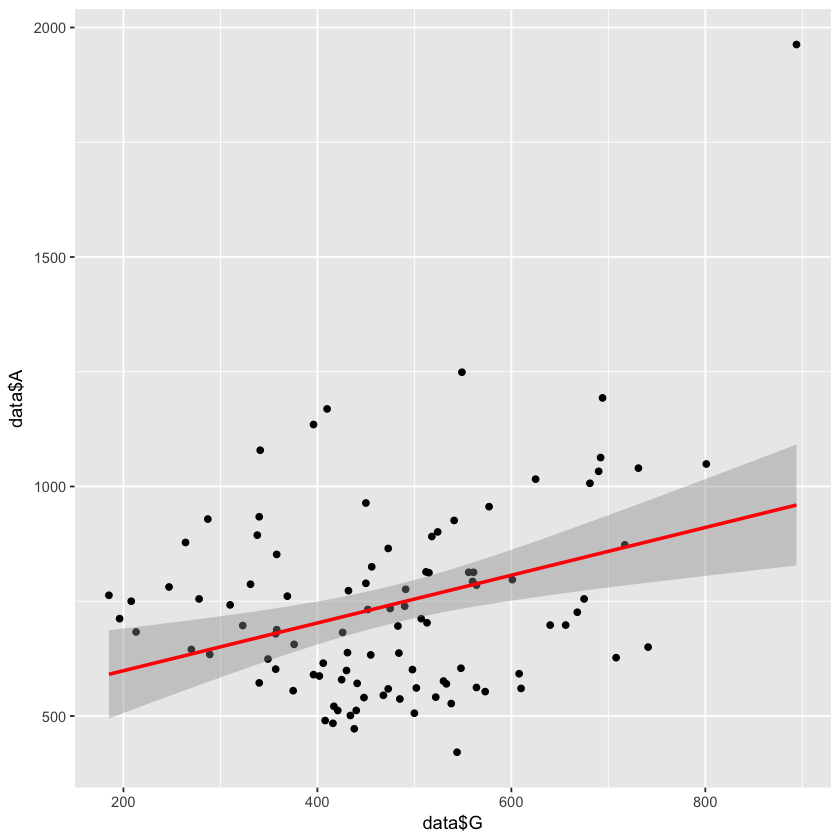

In [5]:
plot1 = ggplot(data,aes(x=data$G,y=data$A)) + geom_point()+ stat_smooth(method = "lm", col = "red")
plot1

a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit.

In [6]:
summary(model1)


Call:
lm(formula = data$A ~ data$G, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
data$G        0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


After the initial fitting, R2 value = 0.1082 and p-value = 0.0008317

b. Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of the fit.

In [7]:
index = which(data$Player == "Wayne Gretzky")
xpoint = data$G[index]
ypoint = data$A[index]

In [8]:
model2 = lm(I(data$A-ypoint) ~ I(data$G-xpoint), data = data)
slope = coef(model2)
typeof(slope)
slope

[1] "double"

(Intercept) I(data$G - xpoint) 
     -1003.4220491          0.5202063

In [9]:
#Finding the intercept for the line
intercept = ypoint - (0.520206294863515 * xpoint)
intercept

[1] 1497.936

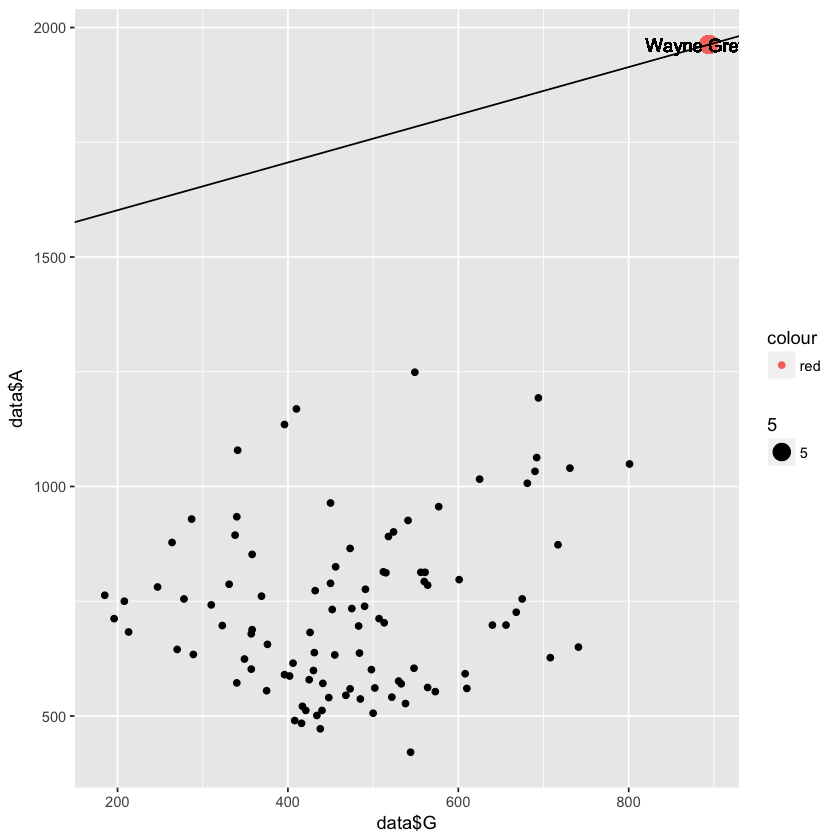

In [12]:
plot2 = ggplot(data,aes(x=data$G,y=data$A)) + geom_point() +geom_point(aes(x=xpoint,y=ypoint,color= "red",size = 5))+ geom_text(aes(x=xpoint,y=ypoint,label="Wayne Gretzky")) + geom_abline(intercept = intercept,slope =slope)
plot2

In [13]:
summary(model2)


Call:
lm(formula = I(data$A - ypoint) ~ I(data$G - xpoint), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1003.4220    66.4463 -15.101  < 2e-16 ***
I(data$G - xpoint)     0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


b. R2 value = 0.1082 and p-value = 0.0008317

Change the model so that it line is forced through Patrick Kane. Note the R2 and p values of the fit.

In [14]:
#Adding information of Patrick Kane
new_data = data.frame()
new_data = rbind(new_data,data)
new_data = rbind(new_data,c("NA","Patrick Kane","NA","NA","NA","NA","NA",285,462,"NA","NA","NA","NA","NA","NA","NA","NA","NA"))
dim(new_data)
new_data$G = as.integer(new_data$G)
new_data$A = as.integer(new_data$A)
dim(new_data)

[1] 101  18

[1] 101  18

In [15]:
index2 = which(new_data$Player == "Patrick Kane")
xpoint2 = (new_data$G[index2])
ypoint2 = (new_data$A[index2])

In [16]:
model3 = lm(I(new_data$A-ypoint2) ~ I(new_data$G-xpoint2), data = new_data)
slope2 = coef(model3)
slope2

(Intercept) I(new_data$G - xpoint2) 
            175.6357602               0.5379576

In [17]:
#Finding the intercept for the line
intercept2 = ypoint2 - (0.537957578829376 * xpoint2)
intercept2

[1] 308.6821

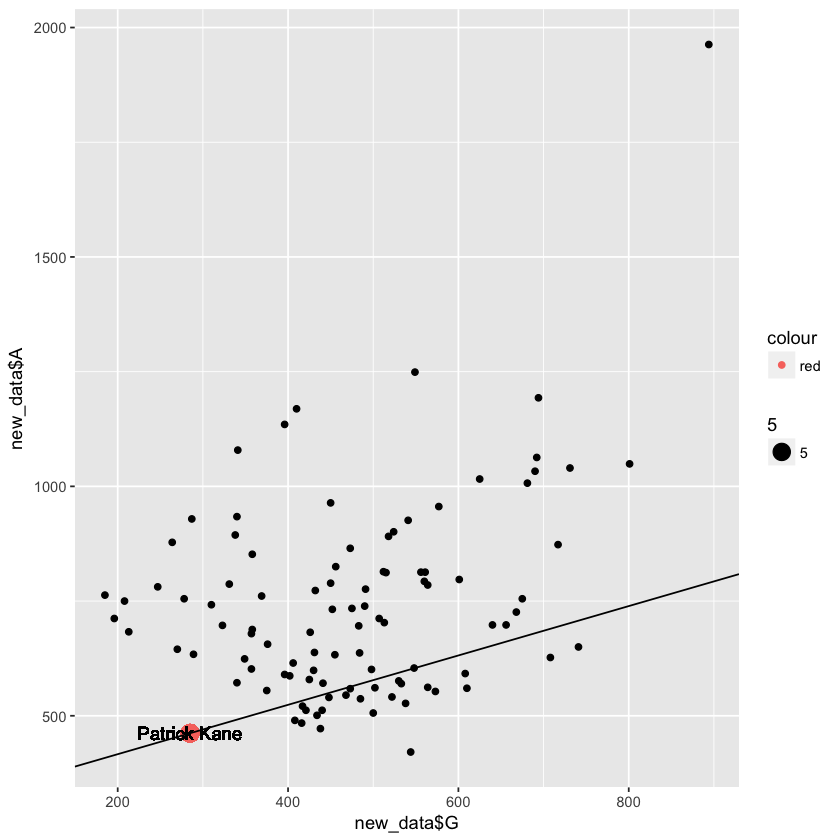

In [18]:
plot3 = ggplot(new_data,aes(x=new_data$G,y=new_data$A)) + geom_point() +geom_point(aes(x=xpoint2,y=ypoint2,color= "red",size = 5))+ geom_text(aes(x=xpoint2,y=ypoint2,label = "Patrick Kane")) + geom_abline(intercept = intercept2,slope =slope2)
plot3

In [19]:
summary(model3)


Call:
lm(formula = I(new_data$A - ypoint2) ~ I(new_data$G - xpoint2), 
    data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             175.6358    34.8548   5.039 2.11e-06 ***
I(new_data$G - xpoint2)   0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


c. R2 value = 0.116 and p-value = 0.0004909

d. Make all the model go through (0,0) and create new models. Note R2 and p values of the fit.

Model 1

In [20]:
model1d = lm(I(data$A) ~ I(data$G) + 0 , data = data)
slope1d = coef(model1d)

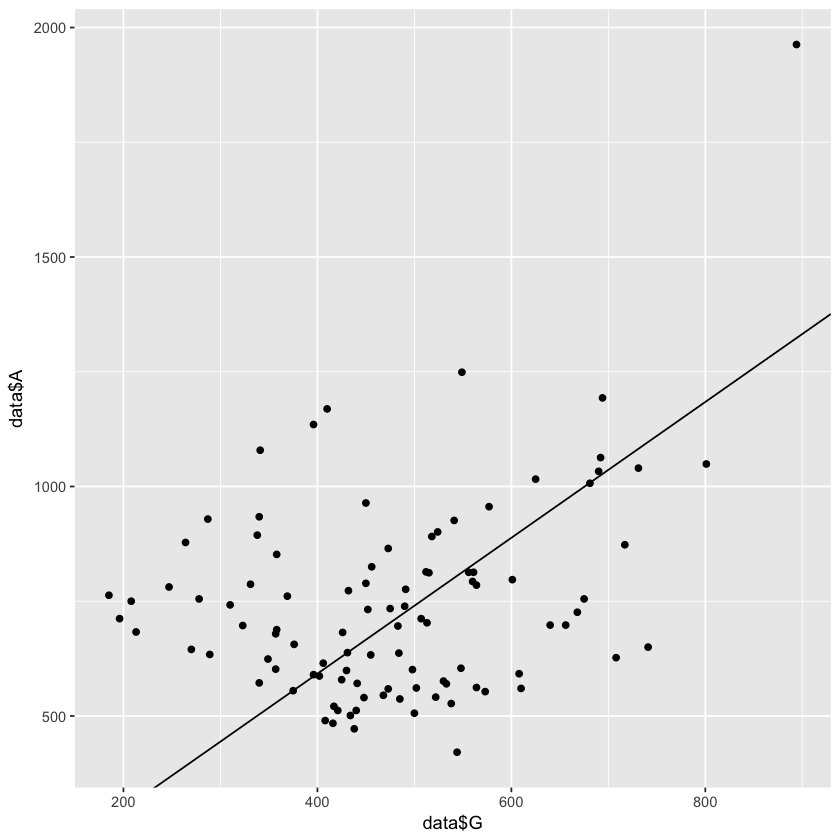

In [21]:
plot1d = ggplot(data,aes(x=data$G,y=data$A)) + geom_point() + geom_abline(intercept = 0 ,slope =slope1d)
plot1d

In [22]:
summary(model1d)


Call:
lm(formula = I(data$A) ~ I(data$G) + 0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
I(data$G)  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


d1. R2 value = 0.8982 and p-value = < 2.2e-16

Model 2: Model through origin and the player Wayne Gretzky.

In [26]:
index = which(data$Player == "Wayne Gretzky")
xpoint = data$G[index]
ypoint = data$A[index]

In [27]:
model2d = lm(I(data$A - ypoint) ~ I(data$G - xpoint) + 0 , data = data)
slope2d = coef(model2d)

In [28]:
#Finding the intercept for the line
intercept2d = ypoint - (2.68466238522409 * xpoint)

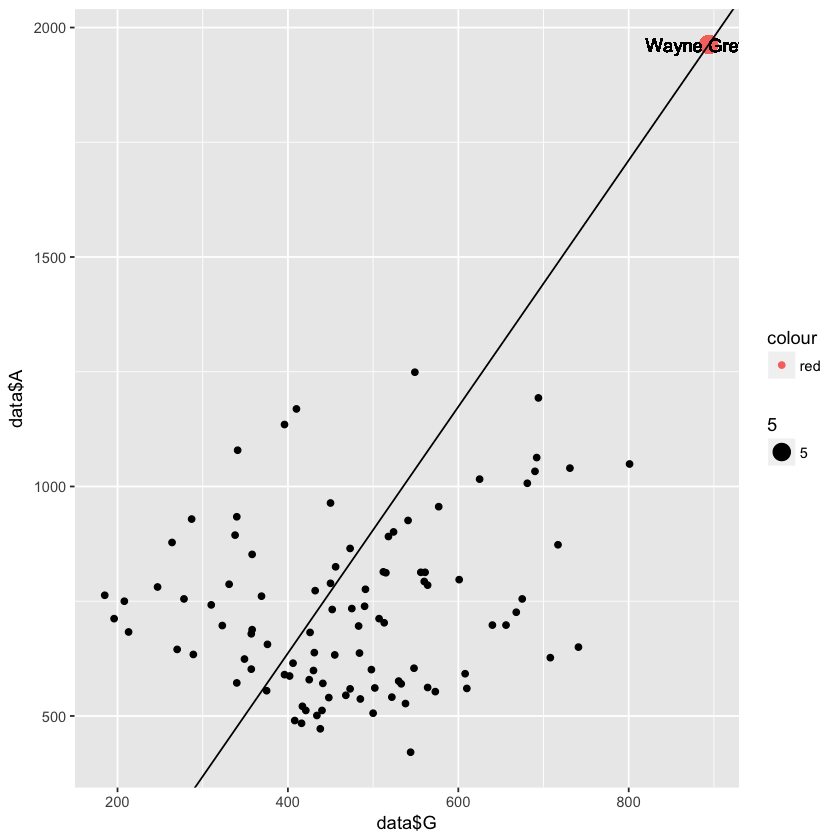

In [29]:
plot2d = ggplot(data,aes(x=data$G,y=data$A)) + geom_point() + geom_point(aes(x=xpoint,y=ypoint,color= "red",size =5)) + geom_text(aes(x=xpoint,y=ypoint,label = "Wayne Gretzky")) + geom_abline(intercept = intercept2d ,slope =slope2d)
plot2d

In [30]:
summary(model2d)


Call:
lm(formula = I(data$A - ypoint) ~ I(data$G - xpoint) + 0, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
I(data$G - xpoint)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


d2. R2 value = 0.9091 and p-value = < 2.2e-16

Model 3: Model through origin and the player Patrick Kane

In [31]:
index = which(new_data$Player == "Patrick Kane")
xpoint2 = new_data$G[index]
ypoint2 = new_data$A[index]
model3d = lm(I(new_data$A-ypoint2) ~ I(new_data$G-xpoint2)+0, data = new_data)
slope2d = coef(model3d)
slope2d

I(new_data$G - xpoint2) 
               1.144932

In [32]:
intercept2d = ypoint2 - (slope2d * xpoint2)
intercept2d

I(new_data$G - xpoint2) 
               135.6943

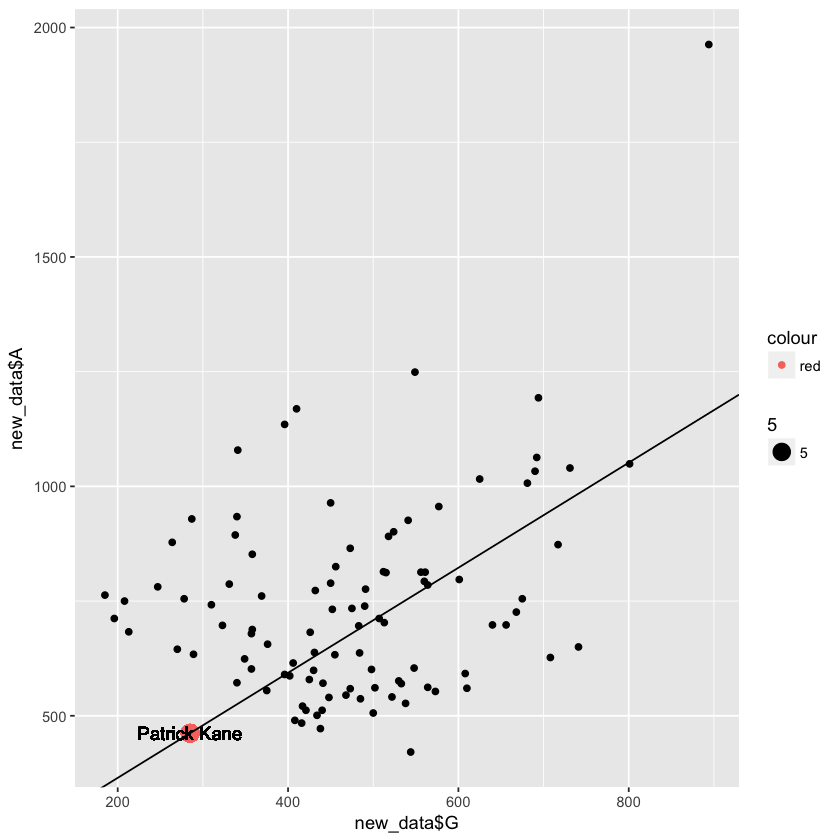

In [33]:
plot3d = ggplot(new_data,aes(x=new_data$G,y=new_data$A)) + geom_point() +geom_point(aes(x=xpoint2,y=ypoint2,color= "red",size =5))+ geom_text(aes(x=xpoint2,y=ypoint2,label = "Patrick Kane")) + geom_abline(intercept = intercept2d,slope =slope2d)
plot3d

In [34]:
summary(model3d)


Call:
lm(formula = I(new_data$A - ypoint2) ~ I(new_data$G - xpoint2) + 
    0, data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
I(new_data$G - xpoint2)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


d3. R2 value = 0.5759 and p-value = < 2.2e-16

e. Create a table of model names (reference), R2 and p values of the fit. Interpret your results.

In [35]:
result = matrix(c("Initial fitting",0.1082,0.0008317,"Wayne Gretzky",0.1082,0.0008317,"Patrick Kane",0.116,0.0004909,"Origin and intial fitting",0.8982,"< 2.2e-16","Origin and Wayne Gretzky",0.9091,"< 2.2e-16","Origin and Patrick Kane",0.5759,"< 2.2e-16"),ncol=3,byrow=TRUE)
colnames(result) = c("Model","R2","p-value")
result = as.table(result)
result

  Model                     R2     p-value  
A Initial fitting           0.1082 0.0008317
B Wayne Gretzky             0.1082 0.0008317
C Patrick Kane              0.116  0.0004909
D Origin and intial fitting 0.8982 < 2.2e-16
E Origin and Wayne Gretzky  0.9091 < 2.2e-16
F Origin and Patrick Kane   0.5759 < 2.2e-16

Interpretation:

R-square is the measure of how well the model is fitting the data. 

Therefore, The model passing through the origin and the player Patrick Kane is better. (R2 = 0.9091)

p-value explains the fitting of the intercept. A model wih lower p-value fits the data well.

Therefore, all the models passing through the origin fit the data well.